# Data normalization
- Identify outliers
- Normalize conditional vectors values between 0 and 1
- Normalize intensities between -1 and 1
- Create conditionals vectors and final dataset 

In [1]:
import ast
from utils import *
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
data = pd.read_csv('../data/constant_stepper_stg3_p2.csv')

data['Wavelengths'] = data['Wavelengths'].apply(lambda x: eval(x) if isinstance(x, str) else x)
data['intensities'] = data['intensities'].apply(lambda x: eval(x) if isinstance(x, str) else x)

data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')

In [3]:
data.head()

,time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,intensities,Wavelengths,idx,stepper_diff
0,2024-06-17 10:08:10.347822666,2.082440,0.0,-338208.0,"[1.416987, -1.878997, -7.094142, 5.856287, -4....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
1,2024-06-17 10:08:10.431182861,2.146321,0.0,-338208.0,"[1.416987, -1.878997, -7.094142, 5.856287, -4....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
2,2024-06-17 10:08:10.852890968,2.146321,0.0,-337925.0,"[1.416987, -1.878997, -7.094142, 5.856287, -4....","[634.835144, 635.296997, 635.758911, 636.22082...",1,283.0
3,2024-06-17 10:08:10.929437160,2.215926,0.0,-337925.0,"[-2.583013, -5.878997, -7.094142, 9.856287, -0...","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0
4,2024-06-17 10:08:10.933794975,2.215926,0.0,-337925.0,"[-2.583013, -5.878997, -7.094142, 9.856287, -0...","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0


## Identify outliers

Typical range: -12.995248 to 3925.00796
Outliers: [-17.207995 -17.207995 -17.207995 ... -21.207995 -21.207995 -21.207995]


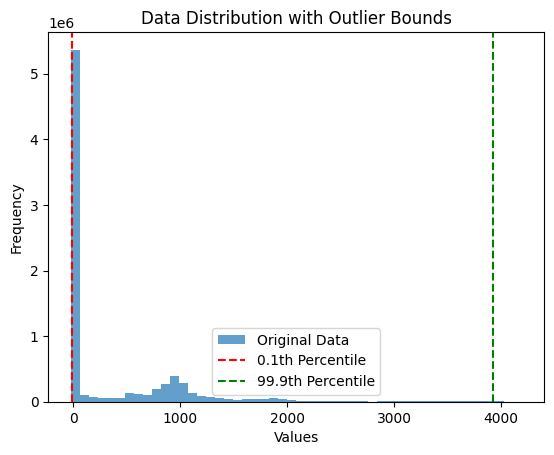

In [4]:
all_intensities = np.concatenate(data['intensities'])
lower_bound_int, upper_bound_int = analyze_outliers(all_intensities, 
                                            0.1, 
                                            99.9)
# change lower bound to 0
lower_bound_int = 30

Typical range: 1.698786 to 2.215926
Outliers: [2.223322 2.248488 2.26343  2.243279 2.243279 2.220513 2.220513 1.68496
 1.68496  1.68496  1.68496  1.695206 1.695206]


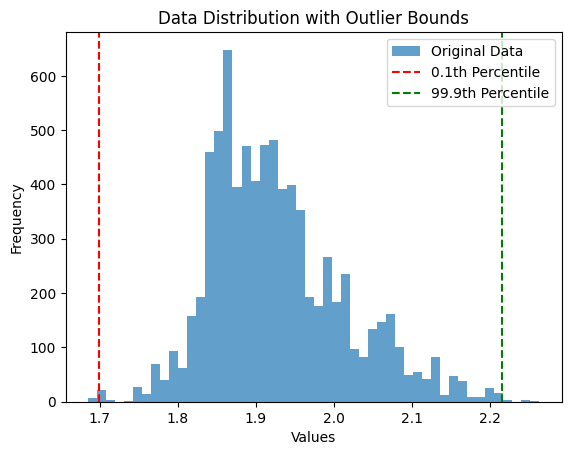

In [5]:
lower_bound_op, upper_bound_op = analyze_outliers(data.Stage3_OutputPower.values, 
                                            0.1, 
                                            99.9)

Typical range: -1.589966 to 1.038879
Outliers: [-1.598083 -1.598083 -1.598083  1.054535  1.054535  1.054535  1.054535
  1.040131  1.040131 -1.614288 -1.614288 -1.614288 -1.614288]


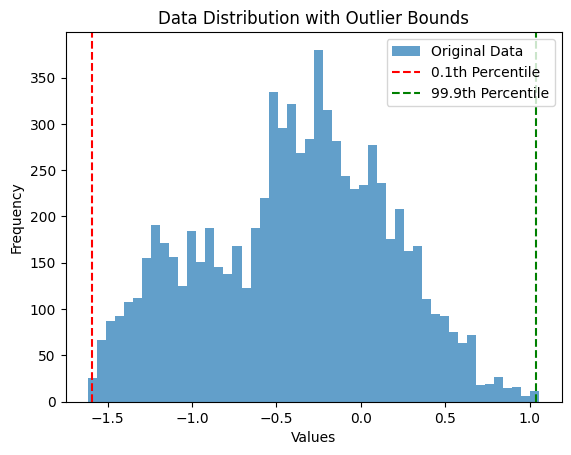

In [6]:
lower_bound_piezo, upper_bound_piezo = analyze_outliers(data.Stage3_Piezo.values, 
                                            0.1, 
                                            99.9)

Typical range: 0.0 to 672.0
Outliers: []


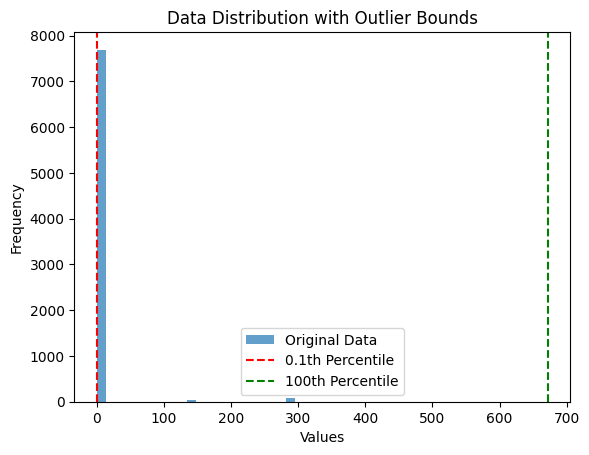

In [7]:
lower_bound_stpdiff, upper_bound_stpdiff = analyze_outliers(data.stepper_diff.values, 
                                            0.1, 
                                            100)

## Normalization
### Intensities

In [8]:
data['intensities'] = data['intensities'].apply(lambda x: clip_and_normalize(x,
                                                                             lower_bound_int, 
                                                                             upper_bound_int, 
                                                                             norm_min=-1, 
                                                                             norm_max=1))
data.head()

,time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,intensities,Wavelengths,idx,stepper_diff
0,2024-06-17 10:08:10.347822666,2.082440,0.0,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
1,2024-06-17 10:08:10.431182861,2.146321,0.0,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
2,2024-06-17 10:08:10.852890968,2.146321,0.0,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,283.0
3,2024-06-17 10:08:10.929437160,2.215926,0.0,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0
4,2024-06-17 10:08:10.933794975,2.215926,0.0,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0


In [9]:
# Flatten the intensities into a single list
all_intensities = np.concatenate(data['intensities'].values)

# Calculate statistics
min_val = np.min(all_intensities)
max_val = np.max(all_intensities)
mean_val = np.mean(all_intensities)
median_val = np.median(all_intensities)
variance_val = np.var(all_intensities)

# Print statistics
print(f"Minimum Intensity: {min_val}")
print(f"Maximum Intensity: {max_val}")
print(f"Mean Intensity: {mean_val}")
print(f"Median Intensity: {median_val}")
print(f"Variance of Intensities: {variance_val}")

Minimum Intensity: -1.0
Maximum Intensity: 1.0
Mean Intensity: -0.8250498371773922
Median Intensity: -1.0
Variance of Intensities: 0.10196260184499316


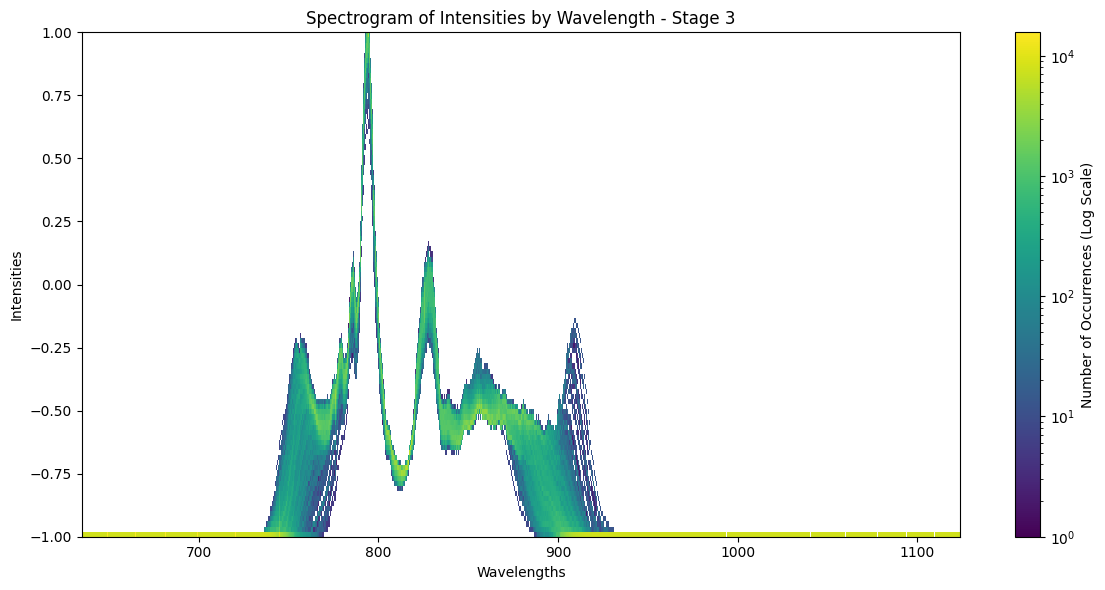

In [10]:
wavelengths = data['Wavelengths'].iloc[0]
intensities = data['intensities']

create_spectrogram(wavelengths, intensities, label="Spectrogram of Intensities by Wavelength - Stage 3")

### Conditional vector

In [11]:
data['Stage3_OutputPower'] = clip_and_normalize(data['Stage3_OutputPower'], 
                                                    lower_bound_op, 
                                                    upper_bound_op)
data.head()

,time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,intensities,Wavelengths,idx,stepper_diff
0,2024-06-17 10:08:10.347822666,0.741876,0.0,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
1,2024-06-17 10:08:10.431182861,0.865404,0.0,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
2,2024-06-17 10:08:10.852890968,0.865404,0.0,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,283.0
3,2024-06-17 10:08:10.929437160,1.000000,0.0,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0
4,2024-06-17 10:08:10.933794975,1.000000,0.0,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0


In [12]:
data['Stage3_Piezo'] = clip_and_normalize(data['Stage3_Piezo'], 
                                                    lower_bound_piezo, 
                                                    upper_bound_piezo)
data.head()

,time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,intensities,Wavelengths,idx,stepper_diff
0,2024-06-17 10:08:10.347822666,0.741876,0.604815,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
1,2024-06-17 10:08:10.431182861,0.865404,0.604815,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.0
2,2024-06-17 10:08:10.852890968,0.865404,0.604815,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,283.0
3,2024-06-17 10:08:10.929437160,1.000000,0.604815,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0
4,2024-06-17 10:08:10.933794975,1.000000,0.604815,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.0


In [13]:
data['stepper_diff'] = clip_and_normalize(data['stepper_diff'], 
                                                    lower_bound_stpdiff, 
                                                    upper_bound_stpdiff)
data.head()

,time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,intensities,Wavelengths,idx,stepper_diff
0,2024-06-17 10:08:10.347822666,0.741876,0.604815,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.000000
1,2024-06-17 10:08:10.431182861,0.865404,0.604815,-338208.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",0,0.000000
2,2024-06-17 10:08:10.852890968,0.865404,0.604815,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.421131
3,2024-06-17 10:08:10.929437160,1.000000,0.604815,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.000000
4,2024-06-17 10:08:10.933794975,1.000000,0.604815,-337925.0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[634.835144, 635.296997, 635.758911, 636.22082...",1,0.000000


In [14]:
data.describe()

,time,Stage3_OutputPower,Stage3_Piezo,Stage3_Stepper,idx,stepper_diff
count,7834,7834.000000,7834.000000,7834.000000,7834.000000,7834.000000
mean,2024-06-17 10:18:22.102510848,0.441465,0.454989,-319752.763467,72.587695,0.006706
min,2024-06-17 10:08:10.347822666,0.000000,0.000000,-338208.000000,0.000000,0.000000
25%,2024-06-17 10:13:35.832232704,0.319474,0.294583,-327457.000000,40.000000,0.000000
50%,2024-06-17 10:18:23.038426880,0.416390,0.471036,-318127.000000,80.000000,0.000000
75%,2024-06-17 10:23:07.504600576,0.534272,0.612698,-309020.000000,116.000000,0.000000
max,2024-06-17 10:27:56.776968002,1.000000,1.000000,-302907.000000,142.000000,1.000000
std,NaN,0.167406,0.210886,10338.457573,42.400572,0.053176


## Create dataset

In [16]:
# Create 'cond_vector' as a numpy array
columns_for_cond_vector = [
    'Stage3_OutputPower',
    'Stage3_Piezo',
    'stepper_diff',
]
data['cond_vector'] = data[columns_for_cond_vector].apply(lambda row: np.array(row.values), axis=1)

# Keep only the required columns
data = data[['time', 'idx', 'intensities', 'cond_vector']]

data.head()

,time,idx,intensities,cond_vector
0,2024-06-17 10:08:10.347822666,0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.7418764744556601, 0.6048154227426874, 0.0]"
1,2024-06-17 10:08:10.431182861,0,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.8654039525080247, 0.6048154227426874, 0.0]"
2,2024-06-17 10:08:10.852890968,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[0.8654039525080247, 0.6048154227426874, 0.421..."
3,2024-06-17 10:08:10.929437160,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 0.6048154227426874, 0.0]"
4,2024-06-17 10:08:10.933794975,1,"[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1....","[1.0, 0.6048154227426874, 0.0]"


## Save dataset

In [17]:
data['intensities'] = data['intensities'].apply(lambda x: ','.join(map(str, x)))
data['cond_vector'] = data['cond_vector'].apply(lambda x: ','.join(map(str, x)))

data.to_csv('../data/constant_stepper_stg3_p3.csv', index=False)